In [6]:
import pandas as pd
import numpy as np

from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage


# Part (a)

## Load the gene expression data set

In [ ]:
gene_data_set = pd.read_csv('Ch12Ex13.csv', header=None)

print(gene_data_set.shape)
print(gene_data_set.head())

40
         0         1         2         3         4         5         6   \
0 -0.961933  0.441803 -0.975005  1.417504  0.818815  0.316294 -0.024967   
1 -0.292526 -1.139267  0.195837 -1.281121 -0.251439  2.511997 -0.922206   
2  0.258788 -0.972845  0.588486 -0.800258 -1.820398 -2.058924 -0.064764   
3 -1.152132 -2.213168 -0.861525  0.630925  0.951772 -1.165724 -0.391559   
4  0.195783  0.593306  0.282992  0.247147  1.978668 -0.871018 -0.989715   

         7         8         9   ...        30        31        32        33  \
0 -0.063966  0.031497 -0.350311  ... -0.509591 -0.216725 -0.055506 -0.484449   
1  0.059543 -1.409645 -0.656712  ...  1.700708  0.007290  0.099062  0.563853   
2  1.592124 -0.173117 -0.121087  ... -0.615472  0.009999  0.945810 -0.318521   
3  1.063619 -0.350009 -1.489058  ... -0.284277  0.198946 -0.091833  0.349628   
4 -1.032253 -1.109654 -0.385142  ... -0.692998 -0.845707 -0.177497 -0.166491   

         34        35        36        37        38        39  
0

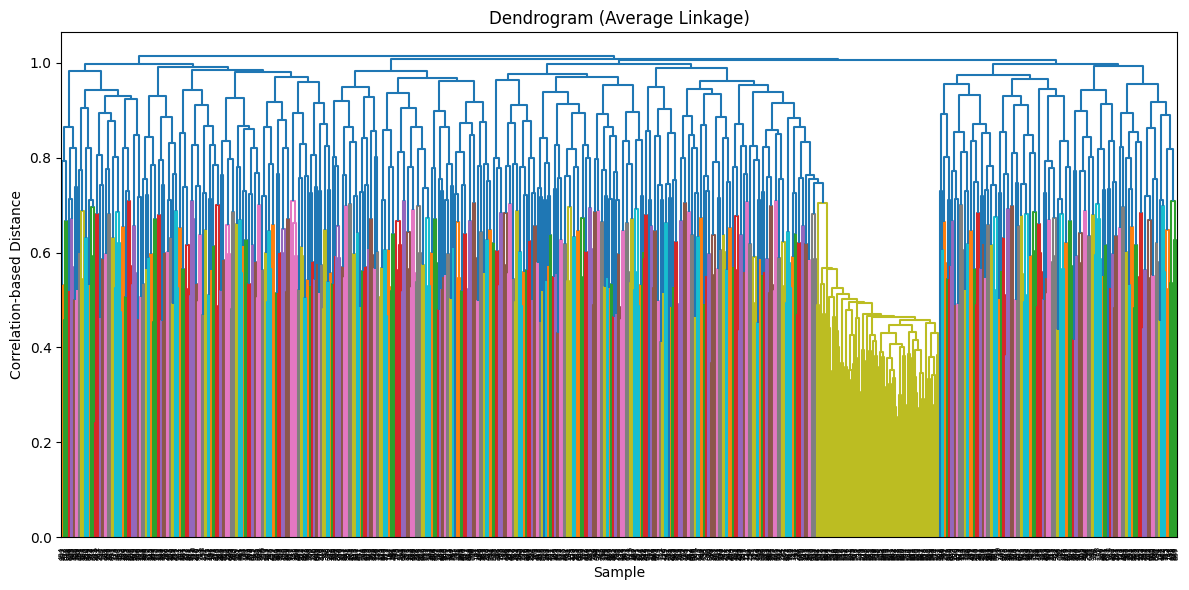

In [14]:
HClust = AgglomerativeClustering # for a shorter name

# Compute correlation-based distance
# Correlation-based distance = 1 - correlation
correlation_matrix = gene_data_set.T.corr()  # Transpose to compute correlation between samples
correlation_distance = 1 - correlation_matrix # compute the correlation distance

# Perform hierarchical clustering with complete linkage
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='average',
                 metric='precomputed')  # Use precomputed distance matrix
hc_comp.fit(correlation_distance)

# Compute linkage for dendrogram plotting
linkage_matrix = compute_linkage(hc_comp)

# Plot the dendrogram
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize=(12, 6))
dendrogram(linkage_matrix, ax=ax)
ax.set_xlabel('Sample')
ax.set_ylabel('Correlation-based Distance')
ax.set_title('Dendrogram (Average Linkage)')
fig.tight_layout()

# Part (b): Find genes that differ most across two groups

In [ ]:
from scipy.stats import ttest_ind
gene_data_set = gene_data_set.T # transpose to have samples in rows and genes in columns
healthy_group = gene_data_set.iloc[:20,:] # healthy group in the data set
patient_group = gene_data_set.iloc[20:,:]  # patient group in the data set
t_stats = [] # to store t-statistics for each gene

for gene in range(gene_data_set.shape[1]):
    stat, p_value = ttest_ind(healthy_group.iloc[:,gene],
                              patient_group.iloc[:,gene],
                              equal_var=False) # Welch's t-test
    t_stats.append(np.absolute(stat)) # store absolute t-statistic value

# Create a DataFrame to store t-statistics values
t_statistic_test_result = pd.DataFrame({
    "gene": np.arange(gene_data_set.shape[1]),
    "t_stat": t_stats,
})

# sort genes by absolute t-statistic values in descending order
t_statistic_test_result = t_statistic_test_result.sort_values(by='t_stat', ascending=False)

print(t_statistic_test_result.head(5)) # print top 10 genes with highest absolute t-statistic values



     gene     t_stat
501   501  10.316705
588   588  10.024607
599   599   9.623413
589   589   8.976247
564   564   8.628749
